<a href="https://colab.research.google.com/github/janchorowski/dl_uwr/blob/summer2021/Assignments/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3

**Submission deadlines:**
- get at least 4 points by Tuesday, 12.04.2022
- remaining points: last lab session before or on Tuesday, 26.04.2022

**Points:** Aim to get 12 out of 16 possible points

## Submission instructions
The class is held remotely. To submit your solutions please show the notebook over the video call. Make sure you know all the questions and answers, and that the notebook contains results (before presentation do `Runtime -> Restart and run all`)

We provide starter code, however, you are not required to use it as long as you properly solve the tasks.

As always, please submit corrections using GitHub's Pull Requests to https://github.com/janchorowski/dl_uwr.

# Problem 1: Understanding the VGG network

In this task we will load a pre-trained model of the [VGG network](http://www.robots.ox.ac.uk/~vgg/research/very_deep/). It's a convolutional network developed at the Oxford University, trained on the [Imagenet Large Scale Visual Recognition Challenge 2012 (ILSVRC2012)](http://image-net.org/challenges/LSVRC/2012/) classificatiom dataset of 1.2 million training images of 1000 classes. A few VGG models of different depth have been proposed. The diagram below presents VGG16. Details of those models: [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556) by Simonyan and Zisserman.

![vgg16](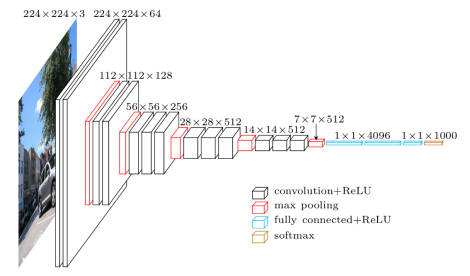
)

We will investigate how VGG classifies images, and 
try to build a deeper understanding of which parts of
a particular input image influence the output of the network.
We will start by simply occluding parts of the image
with a square of zeros anchored at point $(i, j)$ ,
and analyzing how the signal propagated through the network changes.
Because pre-processing for VGG requires to subtract the mean,
the most neutral occluding squares will appear grey when pre-processing is reversed.
Further reading: [Visualizing and Understanding Convolutional Networks](https://arxiv.org/abs/1311.2901)
by Zeiler and Fergus.

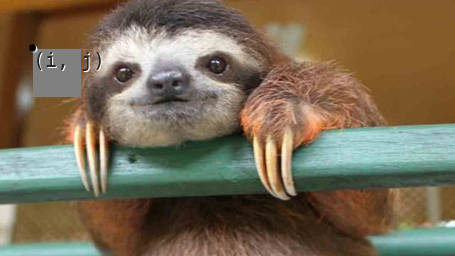

Let $X^{L:m}_{(k,l)}$ denote the input image tensor procesed by 
the $m$-th map of layer $L$,
where $(k, l)$ denote position in the map. To complete the assignment:
1. **[1p]** Load a pre-trained model of a VGG network (e.g., VGG-19) and inspect its architecture.
  Classify at least 5 images of your
  choice (i.e. downloaded off the internet, not 5 more from Imagenet test set) and plot them along with top-5 predictions returned by the network. We provide a mapping from
  numerical class labels to textual descriptions.
  It is vital to apply the same pre-processing as the one which has been used during network training.

2. **[2p]** Implement and test heatmaps generated by iteratively occluding parts of the input image.
  * Implement a data iterator which takes an input image and iteratively occludes part of the image with a
    rectangle (see sample image above).
  * Implement a function `layer_activations(x, layer_name)` of
    the VGG network class,
    which taps into the network and returns activations of a chosen layer. 
    For each occluding position $(i, j)$ in the input image, we can record 
    sum of activations of feature map $m$ in layer $L$ as a heatmap
    $h_{(i,j)}^{L:m} = \sum_{k,l} X^{L:m}_{(k,l)}$. 
    Moving around the occluding rectangle
    changes the activations. Plot heatmaps $h^{L:m}$ for
    a few selected layers and images.
  * For each occluding position $(i, j)$ in the input image, we can record
    output probability of the true class $C$ and store it as $p(C|i,j)$.
    Plot such probability maps for a few images. Plot maps of network predictions
    $\text{argmax}_c p(c|i,j)$, which should reveal which occluding positions
    change the prediction of the network.

3. **[1p]** Faster heat-mapping using integrated gradients

    A quick and approximate method for computing the importance of a pixel is to compute the gradient of the output associated with the correct class with respect to the pixels. 
    
    However, better heatmaps can be obtained using the [Integrated Gradients](https://arxiv.org/abs/1703.01365) approach in which a series of gradients is computed, on images that range from a non-informative one (all gray) to the target image. 
    
    Implement intgrated gradients method: compute the gradients with respect the network's inputs for 50-300 images that linearly interpolate between an all-gray image and the target image. Then compute the magnitute of the gradients for the three channel of each pixel, and add all the magnitudes. Plot the resulting pixel saliencies and overlay them with the image, as shown in the example.

4. **[1p-2p]** Evaluate SHAP or LIME pixel attributions using a library implementation such as https://shap.readthedocs.io/en/stable/index.html or https://github.com/marcotcr/lime (this exercise is worth 1p per tested method).


5. **[1p]** Compare on a few images the workings of at least 2 attribution methods, such as SHAP, Integrated Gradients, or occlusions. Comment on their similarities and differences.

6. **[2p]** select a few neurons in each layer and try to find images to which they respond the most. Then visualize the gradient with respect to the input pixels at the mostly exciting patches. Try to recreate the figure 2 from M. Zieler Visualizing and Understanding Convolutional Neural Networks (https://arxiv.org/pdf/1311.2901.pdf)

# Problem 2: Reusing a VGG Network [2p]

Training large-scale models takes much time and resources. It also requires caution when picking hyperparameters. It is a common practice to share learned parameters of large models, and reuse them in different tasks. Weight matrices can be shared, even between entirely different frameworks. Further reading: [How transferable are features in deep neural networks?](https://arxiv.org/abs/1411.1792) by Yosinski et al.

Neural networks trained for image classification might be seen as composed of two elements: a feature extractor, and a classifier. The former is typically made of a stack of convolutional layers, while the latter is the last linear layer of the model.

We will focus on the deepest models - VGG16 and/or VGG19. To complete the task, load pre-trained VGG model. Then:
1. **[1p]** Train the classifier part of the network on the
  [Caltech101](http://www.vision.caltech.edu/Image_Datasets/Caltech101/) dataset of images:
  * replace the classifier with a new randomly initialized one, whose output dimensionality matches
    the number of classes of the Caltech101 dataset. You can replace all layers in the classifier
    part of the VGG with just one affine projection into 102 classes.
  * to significantly reduce training time and avoid destroying network weights early in the training,
    train only the weights of the classifier. You can achieve this by applying the optimization only
    to the classifier's parameters.
    
2. **[1p]** Assess the usefulness of using dropout and data augmentation during classifier training.
  
This procedure should quickly give you less than 10% training errors on the Caltech101 dataset!

# Problem 3: Image reconstruction from Convolutional Neural Networks

In the final problem we understand what a neural network "sees" by searching with gradient descent for images that excite the network in a given way.

Tasks:

1. **[1.5p]** Implement the following method to find images that excite selected neurons: https://towardsdatascience.com/how-to-visualize-convolutional-features-in-40-lines-of-code-70b7d87b0030. There is a sample code given, but it's for an old version of pytorch, so blind copy-paste will not work either way. Rather use it as a guidance to extract the most important ideas to produce code that will be concordant with the rest of the solutions.
2. **[1p]** implement [Google's DeepDream](https://research.googleblog.com/2015/06/inceptionism-going-deeper-into-neural.html) or inceptionism.
3. **[1p-2p]** Generate an adversarial image. More points can be given for controlling the adversarial pixels (e.g. only a small patch, or only the border)
4. **[1.5p]** complete the code below for style transfer and generate new, interesting images,
5. **[1p]** change style transfer code to generate textures (zero the content loss and keep only style term as in https://arxiv.org/pdf/1505.07376.pdf).


## Background on style transfer 

The starter code below provides code for style transfer as in [A Neural Algorithm of Style](https://arxiv.org/abs/1508.06576) by Gatys et al. which uses backpropagation to the image for artistic transformation of images.

Style transfer uses a pre-trained image recognition model.
Input image, initialized to random noise, is optimized in such a way,
so that patterns of activations in certain layers would match both
those of style and content. Weights of the network remain frozen,
as only the input image is being changed (through backpropagation).

Using pre-trained a VGG model, implement the artistic algotihm of style.
Begin by adding to the `VGG` class a function 

  `multi_layer_activations(x, layer_names)` .

It should take a list of layer names and input `x` as input, and return activations in those layers. Make sure   the function does it during a single forward pass.






# Starter code

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Please note that this code needs only to be run in a fresh runtime.
# However, it can be rerun afterwards too.
!pip install -q gdown httpimport

In [3]:
# Torch has to go first due to an importing bug
import collections
import logging
import os
import re
import numpy

import httpimport
import numpy as np
import PIL
import scipy.io
import scipy.ndimage
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
import torchvision
from torch import nn
from torch.autograd import Variable

import shap

logging.getLogger("PIL").setLevel(logging.INFO)


with httpimport.github_repo(
    "janchorowski", "nn_assignments", module="common", branch="nn18"
):
    import common.plotting

In [4]:
# We strongly recommend training using CUDA
CUDA = True


def to_np(x):
    return x.detach().cpu().numpy()


def to_tensor(x, requires_grad=False):
    x = torch.from_numpy(x)
    if CUDA:
        x = x.cuda()
    # return torch.tensor(x, **kwargs)
    if requires_grad:
        return x.clone().contiguous().detach().requires_grad_(True)
    else:
        return x.clone().contiguous().detach()

In [5]:
![ -e ilsvrc_subsample.tar.bz2 ] || gdown 'https://drive.google.com/uc?id=1Y9xfTe9rjvFiX5N9DZqCRm83zHtQUBDC' -O ilsvrc_subsample.tar.bz2
![ -d ilsvrc_subsample ] || tar jxf ilsvrc_subsample.tar.bz2

In [6]:
class ILSVRC2014Sample(object):
    """Mapper from numerical class IDs to their string LABELS and DESCRIPTIONS.
    
    Please use the dicts:
    - id_to_label and label_to_id to convert string labels and numerical ids
    - label_to_desc to get a textual description of a class label
    - id_to_desc to directly get descriptions for numerical IDs
    
    """

    def load_image(self, path):
        img = PIL.Image.open(path)
        img = img.convert("RGB")
        for t in self.transforms:
            img = t(img)
        return numpy.asarray(img).astype("float32") / 255.0

    def __init__(self, num=100):
        self.transforms = [
            torchvision.transforms.Resize(256),
            torchvision.transforms.CenterCrop(224),
        ]

        base_dir = "ilsvrc_subsample/"
        devkit_dir = base_dir

        meta = scipy.io.loadmat(devkit_dir + "/meta.mat")
        imagenet_class_names = []
        self.label_to_desc = {}
        for i in range(1000):
            self.label_to_desc[meta["synsets"][i][0][1][0]] = meta["synsets"][i][0][2][
                0
            ]
            imagenet_class_names.append(meta["synsets"][i][0][1][0])

        img_names = sorted(os.listdir(base_dir + "/img"))[:num]
        img_ids = {int(re.search("\d{8}", name).group()) for name in img_names}
        with open(devkit_dir + "/ILSVRC2012_validation_ground_truth.txt", "r") as f:
            self.labels = [
                imagenet_class_names[int(line.strip()) - 1]
                for i, line in enumerate(f)
                if i + 1 in img_ids
            ]
        self.data = [self.load_image(base_dir + "/img/" + name) for name in img_names]

        self.id_to_label = sorted(self.label_to_desc.keys())
        self.label_to_id = {}
        self.id_to_desc = []
        for id_, label in enumerate(self.id_to_label):
            self.label_to_id[label] = id_
            self.id_to_desc.append(self.label_to_desc[label])

In [7]:
#
# TODO: fill in the blanks in the VGG network as required to solve above problems.
# The function multi_layer_activations is only needed for the last homework.
#


class VGGPreprocess(torch.nn.Module):
    """Pytorch module that normalizes data for a VGG network
    """

    # These values are taken from http://pytorch.org/docs/master/torchvision/models.html
    RGB_MEANS = torch.FloatTensor([0.485, 0.456, 0.406])[None, :, None, None]
    RGB_STDS = torch.FloatTensor([0.229, 0.224, 0.225])[None, :, None, None]

    def forward(self, x):
        """Normalize a single image or a batch of images
        
        Args:
            x: a pytorch Variable containing and float32 RGB image tensor with 
              dimensions (batch_size x width x heigth x RGB_channels) or 
              (width x heigth x RGB_channels).
        Returns:
            a torch Variable containing a normalized BGR image with shape 
              (batch_size x BGR_channels x width x heigth)
        """
        if x.dim() == 3:
            x = torch.unsqueeze(x, 0)
        # x is batch * width * heigth *channels,
        # make it batch * channels * width * heigth
        if x.size(3) == 3:
            x = x.permute(0, 3, 1, 2).contiguous()
        means = self.RGB_MEANS
        stds = self.RGB_STDS
        if x.is_cuda:
            means = means.cuda()
            stds = stds.cuda()
        x = (x - Variable(means)) / Variable(stds)
        return x


class VGG(torch.nn.Module):
    """Wrapper around a VGG network allowing convenient extraction of layer activations.
    
    """

    FEATURE_LAYER_NAMES = {
        "vgg16": [
            "conv1_1",
            "relu1_1",
            "conv1_2",
            "relu1_2",
            "pool1",
            "conv2_1",
            "relu2_1",
            "conv2_2",
            "relu2_2",
            "pool2",
            "conv3_1",
            "relu3_1",
            "conv3_2",
            "relu3_2",
            "conv3_3",
            "relu3_3",
            "pool3",
            "conv4_1",
            "relu4_1",
            "conv4_2",
            "relu4_2",
            "conv4_3",
            "relu4_3",
            "pool4",
            "conv5_1",
            "relu5_1",
            "conv5_2",
            "relu5_2",
            "conv5_3",
            "relu5_3",
            "pool5",
        ],
        "vgg19": [
            "conv1_1",
            "relu1_1",
            "conv1_2",
            "relu1_2",
            "pool1",
            "conv2_1",
            "relu2_1",
            "conv2_2",
            "relu2_2",
            "pool2",
            "conv3_1",
            "relu3_1",
            "conv3_2",
            "relu3_2",
            "conv3_3",
            "relu3_3",
            "conv3_4",
            "relu3_4",
            "pool3",
            "conv4_1",
            "relu4_1",
            "conv4_2",
            "relu4_2",
            "conv4_3",
            "relu4_3",
            "conv4_4",
            "relu4_4",
            "pool4",
            "conv5_1",
            "relu5_1",
            "conv5_2",
            "relu5_2",
            "conv5_3",
            "relu5_3",
            "conv5_4",
            "relu5_4",
            "pool5",
        ],
    }

    def __init__(self, model="vgg19"):
        super(VGG, self).__init__()
        all_models = {
            "vgg16": torchvision.models.vgg16,
            "vgg19": torchvision.models.vgg19,
        }
        vgg = all_models[model](pretrained=True)

        self.preprocess = VGGPreprocess()
        self.features = vgg.features
        self.classifier = vgg.classifier
        self.softmax = torch.nn.Softmax(dim=-1)

        self.feature_names = self.FEATURE_LAYER_NAMES[model]

        assert len(self.feature_names) == len(self.features)

    def forward(self, x):
        """ Return pre-softmax unnormalized logits. 
        """
        x = self.preprocess(x)
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

    def probabilities(self, x):
        """Return class probabilities.
        """
        logits = self(x)
        return nn.functional.softmax(logits, dim=1)

    def layer_activations(self, x, layer_name):
        """Return activations of a selected layer.
        """
        x = self.preprocess(x)
        for name, layer in zip(self.feature_names, self.features):
            x = layer(x)
            if name == layer_name:
                return x
        raise ValueError("Layer %s not found" % layer_name)

    def multi_layer_activations(self, x, layer_names):
        """Return activations of all requested layers.
        """
        pass # TODO implement me

    def predict(self, x):
        """Return predicted class IDs.
        """
        logits = self(x)
        return torch.argsort(logits.reshape(-1), descending=True)[:5]


vgg = VGG("vgg19")

if CUDA:
    vgg.cuda()

In [8]:
# List layers in the model
print("Feature layers")
print("--------------")
for name, layer in zip(vgg.feature_names, vgg.features):
    print("{1: <12} {0: <8}  ({2}".format(name, *str(layer).split("(", 1)))
print("\nClassifier layers")
print("-----------------")
for layer in vgg.classifier:
    print("{: <12}({}".format(*str(layer).split("(", 1)))

Feature layers
--------------
Conv2d       conv1_1   (3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU         relu1_1   (inplace=True)
Conv2d       conv1_2   (64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU         relu1_2   (inplace=True)
MaxPool2d    pool1     (kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d       conv2_1   (64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU         relu2_1   (inplace=True)
Conv2d       conv2_2   (128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU         relu2_2   (inplace=True)
MaxPool2d    pool2     (kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d       conv3_1   (128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU         relu3_1   (inplace=True)
Conv2d       conv3_2   (256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU         relu3_2   (inplace=True)
Conv2d       conv3_3   (256, 256, kernel_size=(3, 3), stride

In [9]:
ilsvrc = ILSVRC2014Sample(40)
vgg.eval()

VGG(
  (preprocess): VGGPreprocess()
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_

In [ ]:
figsize(16, 10)
for i in range(10):
    img = ilsvrc.data[30 + i]
    label = ilsvrc.labels[30 + i]

    img_torch = to_tensor(img)
    predicted_label_id = to_np(vgg.predict(img_torch))[0]
    predicted_label = ilsvrc.id_to_label[predicted_label_id]

    desc = ilsvrc.label_to_desc[label].split(",")
    if label == predicted_label:
        desc.append("Classified correctly :)")
    else:
        desc.append("Misclassified as:")
        desc.extend(ilsvrc.label_to_desc[predicted_label].split(","))

    ax = subplot(2, 5, 1 + i)
    ax.set_xlabel("\n".join(desc))  # , {'verticalalignment': 'bottom'})
    ax.set_xticklabels([], visible=False)
    ax.set_yticklabels([], visible=False)
    ax.tick_params(axis="both", which="both", bottom="off", left="off", top="off")
    # ax.grid(False)
    imshow(img)

## Problem 1

### 1.1 Implement classification of your own images below

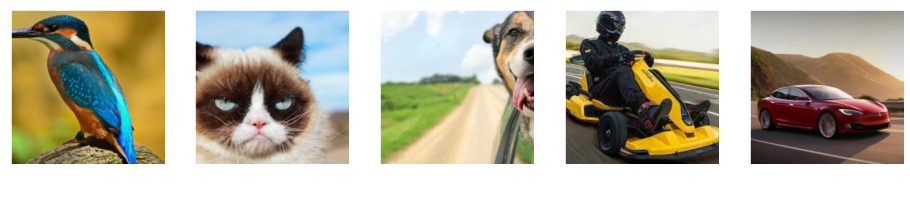

In [9]:

figsize(16, 5)
paths = ["bird.jpeg", "cat.jpg", "dog.jpg", "gokart.jpeg", "car.jpg"]
for i, path in enumerate(paths):
    img = ilsvrc.load_image("./test-images/" + path)

    img_torch = to_tensor(img)
    predicted_label_id = to_np(vgg.predict(img_torch))[0]
    predicted_label = ilsvrc.id_to_label[predicted_label_id]

    desc = ilsvrc.label_to_desc[predicted_label].split(",")

    ax = subplot(1, 5, 1 + i)
    ax.set_xlabel("\n".join(desc))  # , {'verticalalignment': 'bottom'})
    ax.set_xticklabels([], visible=False)
    ax.set_yticklabels([], visible=False)
    ax.tick_params(axis="both", which="both", bottom="off", left="off", top="off")
    # ax.grid(False)
    imshow(img)

### 1.2 Analyse the responses of the network when part of the input is obscured

In [10]:
# TODO
# Implement a generator of minibatches which have partial obstructions
# The generator should yield batches of size 'bsz'


def obscured_imgs(img, boxsize=8, bsz=64, stride=4):
    batch = []
    for row in range(0, img.shape[0]-stride, stride):
        for col in range(0, img.shape[1]-stride, stride):
            img_copy = img.copy()
            img_copy[row:(row+boxsize), col:(col+boxsize), :] = 0.5

            batch.append(img_copy)

            if len(batch) == bsz:
                yield np.array(batch)
                batch = []

    yield np.array(batch)

        

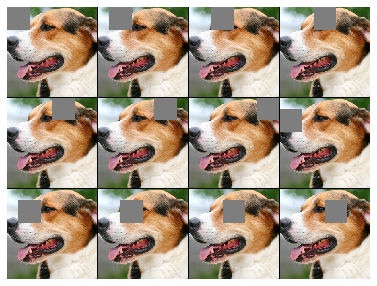

In [13]:
# Show samples from an obscured batch
batch = next(obscured_imgs(ilsvrc.data[27], boxsize=56, bsz=12, stride=28))
batch = np.vstack([im[None] for im in batch])

common.plotting.plot_mat(batch.transpose(0, 3, 1, 2))

In [14]:
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

In [27]:
idx = 32
img = ilsvrc.data[idx]
label = ilsvrc.labels[idx]

# if you run out of GPU mem split batch into smaller ones
bsz = 64
boxsize = 52
stride = 14

vgg.eval()

# Accumulate activations for activation heatmap,
# true class probability map, network prediction map
map_types = ["heat", "prob", "pred"]
maps = {mt: [] for mt in map_types}
for batch in obscured_imgs(img, boxsize, bsz, stride):
    with torch.no_grad():
        batch = to_tensor(batch)
        # TODO choose a layer and a neuron. Aggregate its activations across all locations in the image
        # The sample code used layer conv2_1 and neuron #1
        maps["heat"].append(
            to_np(vgg.layer_activations(batch, "conv2_1"))[:, 1].sum(axis=(1, 2)))
        # maps['heat'].append(to_np(vgg.layer_activations(batch, TODO))[:, 1].sum(axis=(1, 2)))
        # TODO record the probability assigned to the correct class
        # print(f"prob shape: {to_np(vgg.probabilities(batch))[:, ilsvrc.label_to_id[label]].shape}")
        maps["prob"].append(to_np(vgg.probabilities(batch))[:, ilsvrc.label_to_id[label]])

        # TODO record the network predictions
        maps['pred'].append(np.array([vgg.predict(image)[0] for image in batch]))

# print(maps["heat"][10])

for k in maps:
    maps[k] = np.concatenate(maps[k])
    maps[k] = maps[k].reshape(int(np.sqrt(maps[k].shape[0])), -1)

Text(0.5, 1.0, 'The most probable class as a function\nof the obscuring square location')

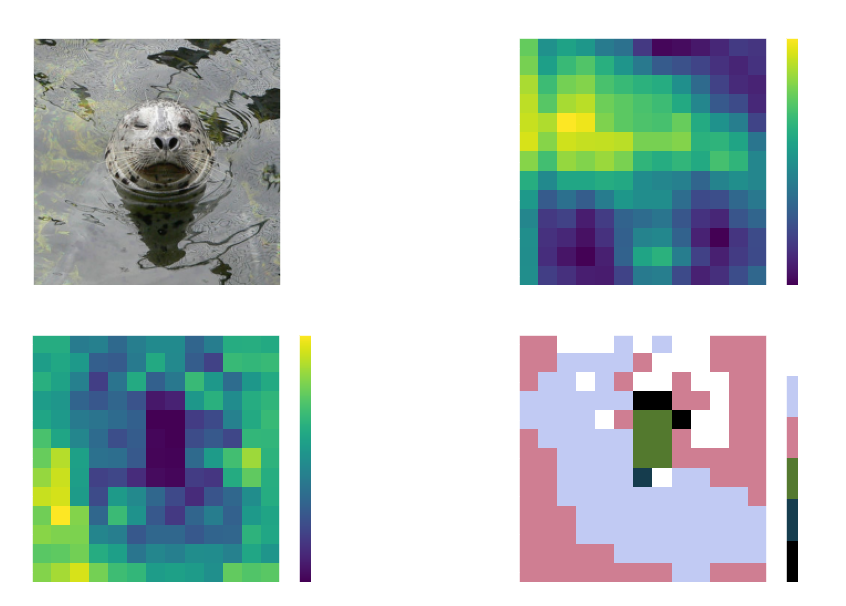

In [35]:
#
# This image recreates figure 7 from M. Zieler et al.
# Visualizing and Understanding Convolutional Neural Networks
# https://arxiv.org/pdf/1311.2901.pdf
#

figure(figsize(16, 10))
subplot(2, 2, 1)
imshow(img)
grid(False)
title("Original Image")

subplot(2, 2, 2)
imshow(maps["heat"], cmap="viridis")
grid(False)
colorbar()
title(
    "Magnitude of activations in a selected layer\n"
    "As a function of the obscuring square location"
)

subplot(2, 2, 3)
imshow(maps["prob"], cmap="viridis")
grid(False)
colorbar()
title(
    "Probability of the correct class as a function\n"
    "of the obscuring square location."
)

subplot(2, 2, 4)
discrete = np.zeros_like(maps["pred"], dtype=np.int64)
values = np.unique(maps["pred"]).astype(np.int64)
for i, v in enumerate(values):
    discrete[np.where(maps["pred"] == v)] = i
num_values = max(values.shape[0], 1)
imshow(discrete, cmap=discrete_cmap(num_values, "cubehelix"))
grid(False)
cb = colorbar(
    ticks=np.arange(
        (num_values - 1.0) / num_values / 2.0,
        num_values,
        (num_values - 1.0) / num_values,
    )
)
# cb.set_ticklabels([ilsvrc.id_to_desc[v] for v in values])
title("The most probable class as a function\n" "of the obscuring square location")

Text(0.5, 1.0, 'Probability of the correct class as a function\nof the obscuring square location.')

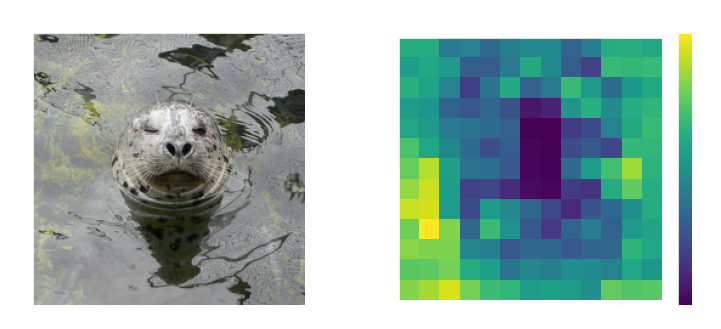

In [39]:

# subplot(2, 2, 4)

### 1.3 [Integrated Gradients](https://arxiv.org/abs/1703.01365)

In [30]:
idx = 16
img = ilsvrc.data[idx][None, ...]
label = ilsvrc.labels[idx]


predicted_id = to_np(vgg.predict(to_tensor(img)))[0]


print(
    "Predicted: %s (correct: %s)"
    % (ilsvrc.id_to_desc[predicted_id], ilsvrc.label_to_desc[label])
)

num_integration_points = 300

batch_size = 20

assert (num_integration_points % batch_size) == 0

weights = np.linspace(0.0, 1.0, num_integration_points).astype("float32")[
    :, None, None, None
]
grads = []


for i in range(0, num_integration_points, batch_size):
    # TODO: batch contains a subset of images interpolating between the all gray image and the selected image
    batch = weights[i : i + batch_size] * img + (1.0 - weights[i : i + batch_size]) * (np.zeros_like(img) + 0.5)
    batch = to_tensor(batch, requires_grad=True)


    # TODO: Get the probabilities for the correct class
    prediction = torch.sum(vgg.probabilities(batch)[:, ilsvrc.label_to_id[label]])
    prediction.backward()
    grads.append(to_np(batch.grad))


grads = np.concatenate(grads, axis=0)


# # # TODO: compute the pixel importance score

importance_scores = np.abs(((img[0] - (np.zeros_like(img)[0] + 0.5)) * grads.mean(0))).sum(-1)

Predicted: axolotl, mud puppy, Ambystoma mexicanum (correct: sea anemone, anemone)


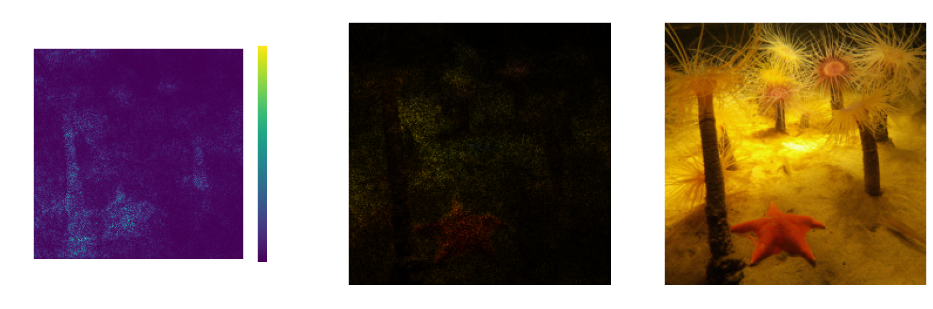

In [31]:

# importance_scores = grads.mean(0).sum(2)
# print(importance_scores.min())
figsize(16, 10)
subplot(1, 3, 1)
imshow(importance_scores, cmap="viridis", norm=Normalize())
colorbar(shrink=0.4)
title("Computed importance of pixels")
grid(False)

subplot(1, 3, 2)
# normalize the scores to be <=1

w = importance_scores / importance_scores.max()
w = w  ** 0.7  # a little gamma correction may make the image prettier
plt.imshow(img[0] * w[:, :, None])
title("Image weighted by the importance")
grid(False)

subplot(1, 3, 3)
plt.imshow(img[0])
title("Original image")
grid(False)

### 1.4 SHAP pixel importances

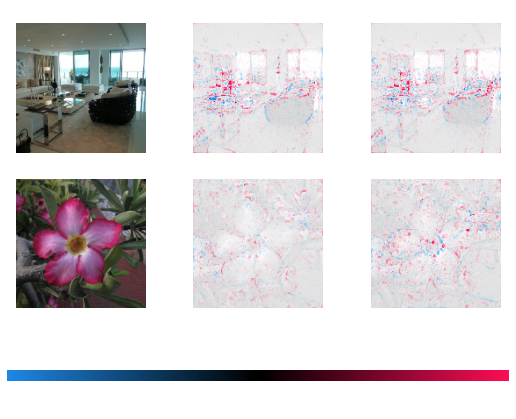

In [17]:
import json

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

def normalize(image):
    if image.max() > 1:
        image /= 255
    image = (image - mean) / std
    # in addition, roll the axis so that they suit pytorch
    return torch.tensor(image.swapaxes(-1, 1).swapaxes(2, 3)).float()

# load the model
model = torchvision.models.vgg16(pretrained=True).eval()

X,y = shap.datasets.imagenet50()

X /= 255

to_explain = X[[16, 32]]

# load the ImageNet class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
fname = shap.datasets.cache(url)
with open(fname) as f:
    class_names = json.load(f)

e = shap.GradientExplainer((model, model.features[7]), normalize(X))
shap_values,indexes = e.shap_values(normalize(to_explain), ranked_outputs=2, nsamples=200)

# get the names for the classes
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)

# plot the explanations
shap_values = [np.swapaxes(np.swapaxes(s, 2, 3), 1, -1) for s in shap_values]

shap.image_plot(shap_values, to_explain, index_names)

### 1.5 Comparison of importance attribution methods

In [80]:
def plot_comparison(idx):

    # -----------  occluding ------------------

    img = ilsvrc.data[idx]
    label = ilsvrc.labels[idx]

    # if you run out of GPU mem split batch into smaller ones
    bsz = 64
    boxsize = 52
    stride = 14

    vgg.eval()

    # Accumulate activations for activation heatmap,
    # true class probability map, network prediction map
    map_types = ["prob", "pred"]
    maps = {mt: [] for mt in map_types}
    # prob = []
    for batch in obscured_imgs(img, boxsize, bsz, stride):
        with torch.no_grad():
            batch = to_tensor(batch)

            maps["prob"].append(to_np(vgg.probabilities(batch))[:, ilsvrc.label_to_id[label]])

            maps['pred'].append(np.array([vgg.predict(image)[0] for image in batch]))

    # print(maps["heat"][10])

    for k in maps:
        maps[k] = np.concatenate(maps[k])
        maps[k] = maps[k].reshape(int(np.sqrt(maps[k].shape[0])), -1)


    figure(figsize(20, 5))
    subplot(1, 3, 1)
    imshow(img)
    grid(False)
    title("Original Image")

    subplot(1, 3, 2)
    imshow(maps["prob"], cmap="viridis")
    grid(False)
    colorbar()
    title(
        "Probability of the correct class as a function\n"
        "of the obscuring square location."
    )

    # -----------  integrated gradients ------------------

    img = ilsvrc.data[idx][None, ...]
    label = ilsvrc.labels[idx]


    predicted_id = to_np(vgg.predict(to_tensor(img)))[0]


    num_integration_points = 300

    batch_size = 20

    assert (num_integration_points % batch_size) == 0

    weights = np.linspace(0.0, 1.0, num_integration_points).astype("float32")[
        :, None, None, None
    ]
    grads = []


    for i in range(0, num_integration_points, batch_size):
        # TODO: batch contains a subset of images interpolating between the all gray image and the selected image
        batch = weights[i : i + batch_size] * img + (1.0 - weights[i : i + batch_size]) * (np.zeros_like(img) + 0.5)
        batch = to_tensor(batch, requires_grad=True)


        # TODO: Get the probabilities for the correct class
        prediction = torch.sum(vgg.probabilities(batch)[:, ilsvrc.label_to_id[label]])
        prediction.backward()
        grads.append(to_np(batch.grad))


    grads = np.concatenate(grads, axis=0)


    importance_scores = np.abs(((img[0] - (np.zeros_like(img)[0] + 0.5)) * grads.mean(0))).sum(-1)

    subplot(1, 3, 3)
    imshow(importance_scores, cmap="viridis", norm=Normalize())
    colorbar()
    title("Computed importance of pixels")
    grid(False)


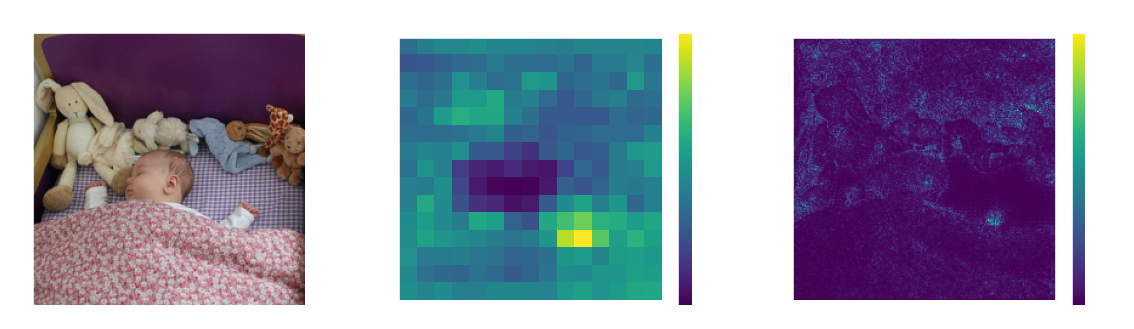

In [49]:
plot_comparison(4)

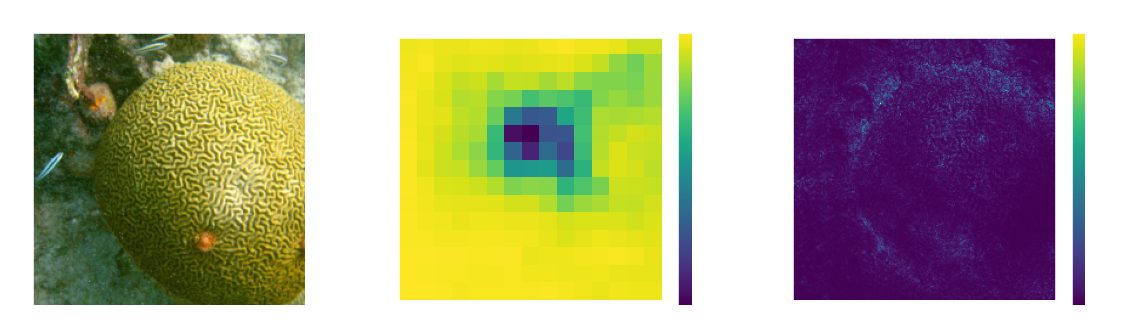

In [81]:
plot_comparison(10)

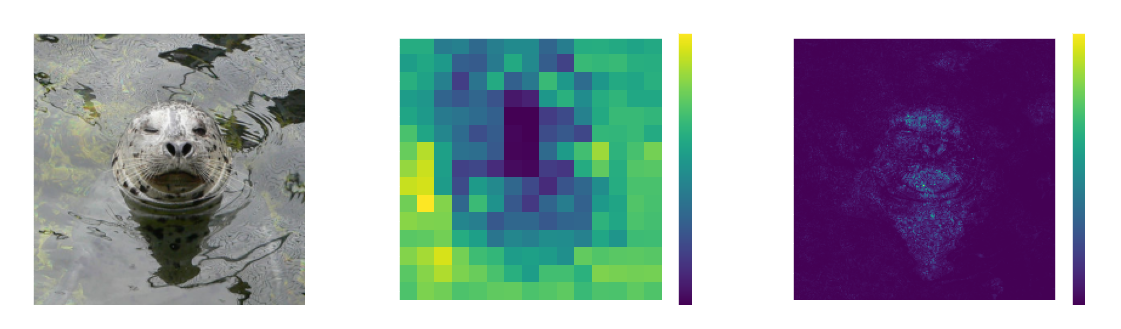

In [82]:
plot_comparison(32)

### 1.6 Find image patches that activate selected neurons

## Problem 2 Starter Code

In [10]:
CUDA = True

vgg = VGG("vgg19")
if CUDA:
    vgg.cuda()

In [11]:
# List layers in the model
print("Feature layers")
print("--------------")
for name, layer in zip(vgg.feature_names, vgg.features):
    print("{1: <12} {0: <8}  ({2}".format(name, *str(layer).split("(", 1)))
print("\nClassifier layers")
print("-----------------")
for layer in vgg.classifier:
    print("{: <12}({}".format(*str(layer).split("(", 1)))

Feature layers
--------------
Conv2d       conv1_1   (3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU         relu1_1   (inplace=True)
Conv2d       conv1_2   (64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU         relu1_2   (inplace=True)
MaxPool2d    pool1     (kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d       conv2_1   (64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU         relu2_1   (inplace=True)
Conv2d       conv2_2   (128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU         relu2_2   (inplace=True)
MaxPool2d    pool2     (kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d       conv3_1   (128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU         relu3_1   (inplace=True)
Conv2d       conv3_2   (256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU         relu3_2   (inplace=True)
Conv2d       conv3_3   (256, 256, kernel_size=(3, 3), stride

In [12]:
class SubsampledImageDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, indexes, transform, **kwargs):
        super(SubsampledImageDataset, self).__init__(**kwargs)
        self.dataset = dataset
        self.indexes = indexes
        self.transform = transform

    def __getitem__(self, i):
        img, label = self.dataset[self.indexes[i]]
        img = self.transform(img)
        return img, label

    def __len__(self):
        return len(self.indexes)

In [13]:
#![ -d 101_ObjectCategories.tar.gz ] || gdown https://drive.google.com/u/0/uc?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp
![ -e 101_ObjectCategories.tar.gz ] || gdown https://drive.google.com/u/0/uc?id=10NIeg2v6b9SzBBkqzbxUT_xTTgzIjsmv
![ -d 101_ObjectCategories ] || tar zxf 101_ObjectCategories.tar.gz

In [14]:
caltech_whole_dataset = torchvision.datasets.ImageFolder("./101_ObjectCategories/")

all_indexes = np.random.permutation(len(caltech_whole_dataset))
train_size = int(len(all_indexes) * 0.8)

caltech_train_dataset = SubsampledImageDataset(
    caltech_whole_dataset,
    all_indexes[:train_size],
    torchvision.transforms.Compose(
        [
            torchvision.transforms.RandomResizedCrop(224),
            torchvision.transforms.RandomHorizontalFlip(),
            torchvision.transforms.ToTensor(),
        ]
    ),
)

caltech_test_dataset = SubsampledImageDataset(
    caltech_whole_dataset,
    all_indexes[train_size:],
    torchvision.transforms.Compose(
        [
            torchvision.transforms.Resize(256),
            torchvision.transforms.CenterCrop(224),
            torchvision.transforms.ToTensor(),
        ]
    ),
)

caltech_datasets = {
    "train": caltech_train_dataset,
    "test": caltech_test_dataset,
}

In [22]:
print(caltech_datasets["train"])

In [15]:
batch_size = 16

caltech_loaders = {
    "train": torch.utils.data.DataLoader(
        caltech_datasets["train"], batch_size=batch_size, num_workers=8, shuffle=True
    ),
    "test": torch.utils.data.DataLoader(
        caltech_datasets["test"], batch_size=batch_size, num_workers=8, shuffle=False
    ),
}

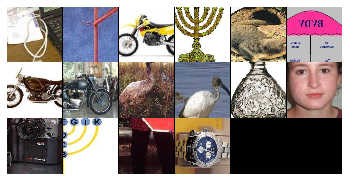

In [16]:
train_batch = next(iter(caltech_loaders["train"]))
common.plotting.plot_mat(to_np(train_batch[0])[:20])

In [17]:
print("\nClassifier layers")
print("-----------------")
for layer in vgg.classifier:
    print("{: <12}({}".format(*str(layer).split("(", 1)))


Classifier layers
-----------------
Linear      (in_features=25088, out_features=4096, bias=True)
ReLU        (inplace=True)
Dropout     (p=0.5, inplace=False)
Linear      (in_features=4096, out_features=4096, bias=True)
ReLU        (inplace=True)
Dropout     (p=0.5, inplace=False)
Linear      (in_features=4096, out_features=1000, bias=True)


In [17]:
# Train only the classifier!
def compute_error_rate(model, data_loader, cuda=True):
    model.eval()
    num_errs = 0.0
    num_examples = 0
    for x, y in data_loader:
        if cuda:
            x = x.cuda()
            y = y.cuda()

        with torch.no_grad():
            outputs = model.forward(x)
            _, predictions = outputs.max(dim=1)
            num_errs += (predictions != y).sum().item()
            num_examples += x.size(0)
    return 100.0 * num_errs / num_examples


def train(
    model, data_loaders, optimizer, criterion, num_epochs=1, log_every=100, cuda=True
):
    if cuda:
        model.cuda()

    iter_ = 0
    epoch = 0
    best_params = None
    best_val_err = np.inf
    history = {"train_losses": [], "train_errs": [], "val_errs": []}
    print("Training the model!")
    print("You can interrupt it at any time.")
    try:
        while epoch < num_epochs:
            model.train()
            # model.train_mode()
            epoch += 1
            for x, y in data_loaders["train"]:
                if cuda:
                    x = x.cuda()
                    y = y.cuda()
                iter_ += 1

                optimizer.zero_grad()
                out = model.forward(x)
                loss = criterion(out, y)
                loss.backward()
                optimizer.step()
                _, predictions = out.max(dim=1)
                err_rate = 100.0 * (predictions != y).sum() / out.size(0)

                history["train_losses"].append(loss.item())
                history["train_errs"].append(err_rate.item())

                                
                if iter_ % log_every == 0:
                    print(
                        "Minibatch {0: >6}  | loss {1: >5.2f} | err rate {2: >5.2f}%".format(
                            iter_, loss.item(), err_rate
                        )
                    )

            val_err_rate = compute_error_rate(model, data_loaders["test"], cuda)
            history["val_errs"].append((iter_, val_err_rate))

            if val_err_rate < best_val_err:
                best_params = model.classifier.parameters
                best_epoch = epoch
                best_val_err = val_err_rate

                
            m = "After epoch {0: >2} | valid err rate: {1: >5.2f}% | doing {2: >3} epochs".format(
                epoch, val_err_rate, num_epochs
            )
            print("{0}\n{1}\n{0}".format("-" * len(m), m))
    except KeyboardInterrupt:
        pass
    if best_params is not None:
        print("\nLoading best params on validation set (epoch %d)\n" % (best_epoch))
        model.classifier.parameters = best_params
    plot_history(history)


def plot_history(history):
    figsize(16, 4)
    subplot(1, 2, 1)
    train_loss = np.array(history["train_losses"])
    semilogy(np.arange(train_loss.shape[0]), train_loss, label="batch train loss")
    legend()

    subplot(1, 2, 2)
    train_errs = np.array(history["train_errs"])
    plot(np.arange(train_errs.shape[0]), train_errs, label="batch train error rate")
    val_errs = np.array(history["val_errs"])
    plot(val_errs[:, 0], val_errs[:, 1], label="validation error rate", color="r")
    ylim(0, 20)
    legend()

Training the model!
You can interrupt it at any time.
Minibatch     50  | loss  2.17 | err rate 43.75%
Minibatch    100  | loss  1.73 | err rate 37.50%
Minibatch    150  | loss  1.38 | err rate 31.25%
Minibatch    200  | loss  1.65 | err rate 50.00%
Minibatch    250  | loss  1.97 | err rate 43.75%
Minibatch    300  | loss  1.41 | err rate 37.50%
Minibatch    350  | loss  0.76 | err rate 18.75%
Minibatch    400  | loss  0.67 | err rate 18.75%
Minibatch    450  | loss  0.80 | err rate 25.00%
----------------------------------------------------------
After epoch  1 | valid err rate: 16.35% | doing  10 epochs
----------------------------------------------------------
Minibatch    500  | loss  0.67 | err rate 18.75%
Minibatch    550  | loss  1.05 | err rate 37.50%
Minibatch    600  | loss  0.84 | err rate 18.75%
Minibatch    650  | loss  1.44 | err rate 37.50%
Minibatch    700  | loss  0.44 | err rate 25.00%
Minibatch    750  | loss  1.08 | err rate 37.50%
Minibatch    800  | loss  1.13 | e

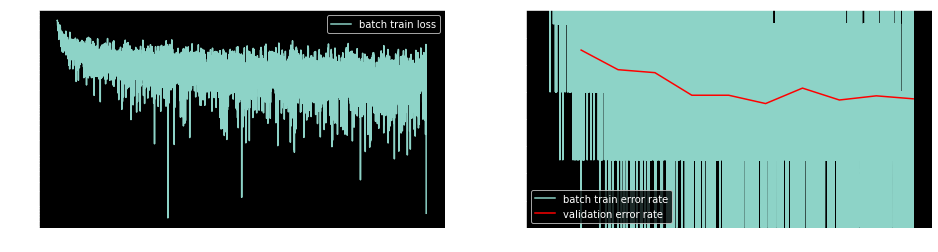

In [20]:
# TODO: implement a new classifier using `torch.nn.Sequential` and `torch.nn.Linear`
classifier = nn.Sequential(
    nn.Linear(in_features=25088, out_features=2000),
    nn.ReLU(),
    nn.Linear(in_features=2000, out_features=102)
)
    

# Replace the classifier of our VGG network
vgg.classifier = classifier

# Disable gradient computation for the all parameter.
# It will speed up the backward pass - the gradient will not be
# backpropagated through the feature extractor.
for p in vgg.parameters():
    p.requires_grad = False

# Reenable gradient computation in our new classifier
for p in vgg.classifier.parameters():
    p.requires_grad = True

criterion = (
    nn.CrossEntropyLoss()
)  # Note: nn.CrossEntropyLoss combines LogSoftmax with NLLLoss

# Train only the params of the classifier
optimizer = torch.optim.Adam(vgg.classifier.parameters(), lr=0.0001)

train(
    vgg, caltech_loaders, optimizer, criterion, num_epochs=10, log_every=50, cuda=True
)


Training the model!
You can interrupt it at any time.
Minibatch     50  | loss  1.90 | err rate 43.75%
Minibatch    100  | loss  2.09 | err rate 56.25%
Minibatch    150  | loss  1.61 | err rate 37.50%
Minibatch    200  | loss  0.89 | err rate 18.75%
Minibatch    250  | loss  1.28 | err rate 31.25%
Minibatch    300  | loss  1.96 | err rate 43.75%
Minibatch    350  | loss  1.35 | err rate 31.25%
Minibatch    400  | loss  1.87 | err rate 62.50%
Minibatch    450  | loss  0.93 | err rate 18.75%
----------------------------------------------------------
After epoch  1 | valid err rate: 16.79% | doing  10 epochs
----------------------------------------------------------
Minibatch    500  | loss  1.21 | err rate 37.50%
Minibatch    550  | loss  1.08 | err rate 31.25%
Minibatch    600  | loss  0.53 | err rate 12.50%
Minibatch    650  | loss  0.61 | err rate 18.75%
Minibatch    700  | loss  1.08 | err rate 18.75%
Minibatch    750  | loss  1.47 | err rate 31.25%
Minibatch    800  | loss  0.86 | e

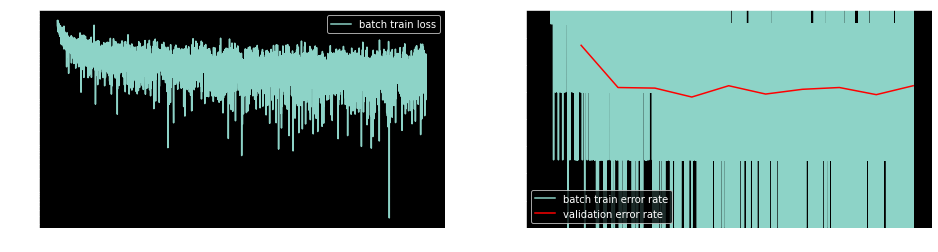

In [18]:
# TODO: implement a new classifier using `torch.nn.Sequential` and `torch.nn.Linear`
classifier = nn.Sequential(
    nn.Linear(in_features=25088, out_features=2000),
    nn.ReLU(),
    nn.Dropout(p=0.2),
    nn.Linear(in_features=2000, out_features=102)
)
    

# Replace the classifier of our VGG network
vgg.classifier = classifier

# Disable gradient computation for the all parameter.
# It will speed up the backward pass - the gradient will not be
# backpropagated through the feature extractor.
for p in vgg.parameters():
    p.requires_grad = False

# Reenable gradient computation in our new classifier
for p in vgg.classifier.parameters():
    p.requires_grad = True

criterion = (
    nn.CrossEntropyLoss()
)  # Note: nn.CrossEntropyLoss combines LogSoftmax with NLLLoss

# Train only the params of the classifier
optimizer = torch.optim.Adam(vgg.classifier.parameters(), lr=0.0001)

train(
    vgg, caltech_loaders, optimizer, criterion, num_epochs=10, log_every=50, cuda=True
)

test_err_rate = compute_error_rate(vgg, caltech_loaders["test"])
print (f"Test error rate: {test_err_rate :.3f}%")

Training the model!
You can interrupt it at any time.
Minibatch     50  | loss  2.25 | err rate 43.75%
Minibatch    100  | loss  2.39 | err rate 50.00%
Minibatch    150  | loss  2.15 | err rate 50.00%
Minibatch    200  | loss  1.32 | err rate 25.00%
Minibatch    250  | loss  2.04 | err rate 50.00%
Minibatch    300  | loss  1.31 | err rate 31.25%
Minibatch    350  | loss  1.41 | err rate 50.00%
Minibatch    400  | loss  0.82 | err rate 25.00%
Minibatch    450  | loss  0.78 | err rate 31.25%
----------------------------------------------------------
After epoch  1 | valid err rate: 17.22% | doing  10 epochs
----------------------------------------------------------
Minibatch    500  | loss  1.40 | err rate 25.00%
Minibatch    550  | loss  0.49 | err rate 18.75%
Minibatch    600  | loss  0.71 | err rate 18.75%
Minibatch    650  | loss  1.19 | err rate 31.25%
Minibatch    700  | loss  1.07 | err rate 37.50%
Minibatch    750  | loss  0.59 | err rate 12.50%
Minibatch    800  | loss  0.47 | e

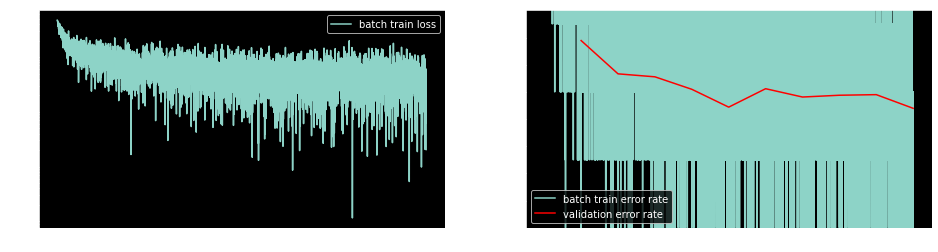

In [19]:
# Network with droupout
classifier = nn.Sequential(
    nn.Linear(in_features=25088, out_features=512),
    nn.ReLU(),
    nn.Dropout(p=0.2),
    nn.Linear(in_features=512, out_features=102)
)
    

# Replace the classifier of our VGG network
vgg.classifier = classifier

# Disable gradient computation for the all parameter.
# It will speed up the backward pass - the gradient will not be
# backpropagated through the feature extractor.
for p in vgg.parameters():
    p.requires_grad = False

# Reenable gradient computation in our new classifier
for p in vgg.classifier.parameters():
    p.requires_grad = True

criterion = (
    nn.CrossEntropyLoss()
)  # Note: nn.CrossEntropyLoss combines LogSoftmax with NLLLoss

# Train only the params of the classifier
optimizer = torch.optim.Adam(vgg.classifier.parameters(), lr=0.0001)

train(
    vgg, caltech_loaders, optimizer, criterion, num_epochs=10, log_every=50, cuda=True
)

test_err_rate = compute_error_rate(vgg, caltech_loaders["test"])
print (f"Test error rate: {test_err_rate :.3f}%")

In [ ]:
# Network with droupout
classifier = nn.Sequential(
    nn.Linear(in_features=25088, out_features=512),
    nn.ReLU(),
    nn.Dropout(p=0.2),
    nn.Linear(in_features=512, out_features=102)
)
    

# Replace the classifier of our VGG network
vgg.classifier = classifier

# Disable gradient computation for the all parameter.
# It will speed up the backward pass - the gradient will not be
# backpropagated through the feature extractor.
for p in vgg.parameters():
    p.requires_grad = False

# Reenable gradient computation in our new classifier
for p in vgg.classifier.parameters():
    p.requires_grad = True

criterion = (
    nn.CrossEntropyLoss()
)  # Note: nn.CrossEntropyLoss combines LogSoftmax with NLLLoss

# Train only the params of the classifier
optimizer = torch.optim.Adam(vgg.classifier.parameters(), lr=0.0001)

train(
    vgg, caltech_loaders, optimizer, criterion, num_epochs=10, log_every=50, cuda=True
)

test_err_rate = compute_error_rate(vgg, caltech_loaders["test"])
print (f"Test error rate: {test_err_rate :.3f}%")

## Problem 3 Starter Code

In [ ]:
![ -e images.tar.bz2 ] || gdown 'https://drive.google.com/uc?id=18y17PXpo_Qwt2l_FF_7ODJYcQYEExOeF' -O images.tar.bz2
![ -d images ] || tar jxf images.tar.bz2

Downloading...
From: https://drive.google.com/uc?id=18y17PXpo_Qwt2l_FF_7ODJYcQYEExOeF
To: /content/images.tar.bz2
13.5MB [00:00, 51.3MB/s]


In [ ]:
!ls images

arab_text.jpg	   hoovertowernight.jpg      starry_night_google.jpg
brad_pitt.jpg	   picasso_selfport1907.jpg  starry_night.jpg
crowd.jpg	   pl_text.jpg		     the_scream.jpg
escher_sphere.jpg  seated-nude.jpg	     tubingen.jpg
frida_kahlo.jpg    shipwreck.jpg	     woman-with-hat-matisse.jpg
golden_gate.jpg    starry_night_crop.png     wood.jpeg


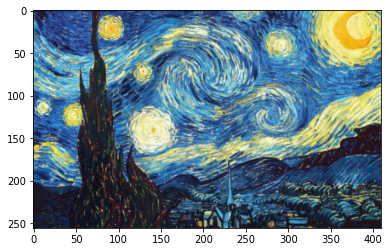

In [ ]:
def load_image(path, size=256):
    img = PIL.Image.open(path)
    img = img.convert("RGB")
    img = torchvision.transforms.Resize(size)(img)
    return numpy.asarray(img).astype("float32") / 255.0


imshow(load_image("images/starry_night.jpg"))
grid(False)

In [ ]:
class StyleTransferNet(object):
    def __init__(
        self,
        style_layers,
        content_layers,
        vgg_model="vgg19",
        content_weight=5e0,
        style_weight=1e2,
    ):
        self.style_layers = style_layers
        self.style_captures = []
        self.style_weight = style_weight
        self.content_layers = content_layers
        self.content_captures = []
        self.content_weight = content_weight
        self.vgg = VGG(vgg_model)
        self.vgg.eval()
        for p in self.vgg.parameters():
            p.requires_grad = False
        self.mse = nn.MSELoss()

    def capture_content(self, x):
        # TODO: implement saving naural activations for a chosen set of content layers
        self.content_captures = TODO

    def capture_style(self, x):
        style_layers = self.vgg.multi_layer_activations(x, self.style_layers)
        self.style_captures = [self._gram_mat(l).detach() for l in style_layers]

    def get_loss(self, x):
        needed_layers = self.content_layers + self.style_layers
        needed_values = self.vgg.multi_layer_activations(x, needed_layers)
        content_values = needed_values[: len(self.content_layers)]
        style_values = needed_values[len(self.content_layers) :]

        self.content_losses = []
        self.style_losses = []

        # TODO:
        # append onto the lists  self.content_losses and self.style_losses
        # the L2 (euclidean) distances between the captured statistics and the
        # reconstructed image's ones. Remember about applying the gram matrix to style!
        # You can use the self.mse to compute the L2 distance
        
        loss = sum(self.content_losses) * self.content_weight
        loss = loss + sum(self.style_losses) * self.style_weight

        return loss

    def _gram_mat(self, x):
        """
        Compute the matrix of feature correlations.
        
        Input:
            x: tensor of size batch_size x num_channels x width x heigth
        
        Output:
            tensor of size batch_size x num_chanels x num_channels given by the formula
            
            out[b, c1, c2] = 1/width 1/heigth \sum_w=1^width \sum_h=1^heigth x[b, c1, w, h] * x[b, c2, w, h]
        """
        # TODO
        # Compute the Gram matrix, as defined in the docstring. Try to implement it as efficiently as possible.
        pass


In [ ]:
# TODO find a good set of layers for the content and style images.
# Note: you will have to tune the content weight!
model = StyleTransferNet(
    style_layers=[TODO],
    style_layers=[TODO],
    content_layers=["relu1_1"],
    content_weight=1e2,
content_layers=[TODO], content_weight=10e0)

if CUDA:
    model.vgg.cuda()

In [ ]:
# style_img_path = 'images/arab_text.jpg'
style_img_path = "images/starry_night.jpg"
content_img_path = "images/golden_gate.jpg"

style_img_size = 256
content_img_size = 256

style_image = load_image(style_img_path, style_img_size)
content_image = load_image(content_img_path, content_img_size)
content_shape = content_image.shape

print("Capturing content")
model.capture_content(to_tensor(content_image))

print("Capturing style")
model.capture_style(to_tensor(style_image))

Capturing content
Capturing style


In [ ]:
# image = load_image(content_img_path, 512)
image = np.random.randn(*content_shape).astype(np.float32) * 0.01 + 0.5
image = to_tensor(image, requires_grad=True)

# try using Adam or LBFGS

# optimizer = torch.optim.Adam([image], lr=0.001)  #, momentum=0.5)
optimizer = torch.optim.LBFGS([image])

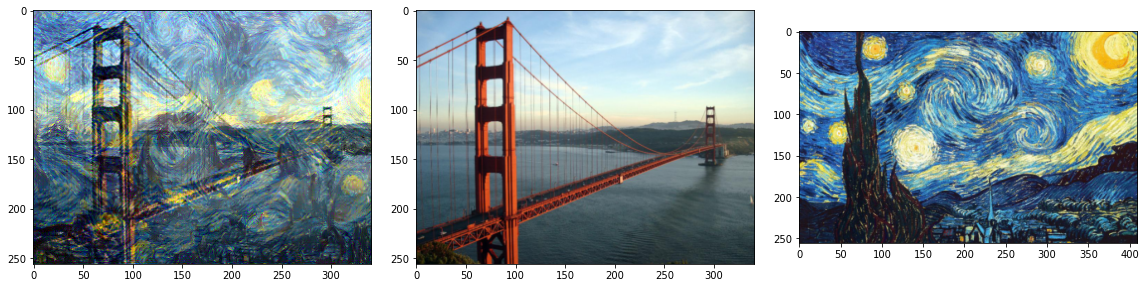

Iteration    175 | loss 38.4378471
  Content loss 1:  26.1348
  Style loss 1:     1.5504
  Style loss 2:     0.7593
  Style loss 3:     5.0138
  Style loss 4:     4.9668


In [ ]:
from IPython import display

# Training loop
max_iters = 500
check_every = 5
old_loss = np.inf
tolerance = 0.00001
try:
    fig = figure(figsize=(16, 10))
    fig.add_subplot(132).imshow(content_image)
    grid(False)
    fig.add_subplot(133).imshow(style_image)
    grid(False)
    ax = fig.add_subplot(131)

    tight_layout()
    imsh = ax.imshow(to_np(image))
    grid(False)
    for iter_ in range(max_iters):

        def closure():
            optimizer.zero_grad()
            loss = model.get_loss(image)
            loss.backward()
            return loss

        loss = optimizer.step(closure)
        # image.data = image.data.clip_(0, 1)

        if iter_ % check_every == 0:
            display.clear_output(wait=True)
            imsh.set_data(np.clip(to_np(image), 0.0, 1.0))
            display.display(fig)

            print("Iteration {0: >6} | loss {1: >10.7f}".format(iter_, loss.item()))
            for i, l in enumerate(model.content_losses):
                print(
                    "  Content loss {}: {: >8.4f}".format(
                        i + 1, l.item() * model.content_weight
                    )
                )
            for i, l in enumerate(model.style_losses):
                print(
                    "  Style loss {}: {: >10.4f}".format(
                        i + 1, l.item() * model.style_weight
                    )
                )

        old_loss = loss.item()
except KeyboardInterrupt:
    display.clear_output(wait=True)
    print("Iteration {0: >6} | loss {1: >10.7f}".format(iter_, loss.item()))

In [ ]:
plt.imshow(np.clip(to_np(image), 0.0, 1.0))
grid(False)